# Titanic - Machine Learning from Disaster

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Titanic---Machine-Learning-from-Disaster" data-toc-modified-id="Titanic---Machine-Learning-from-Disaster-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Titanic - Machine Learning from Disaster</a></span><ul class="toc-item"><li><span><a href="#Importing-data" data-toc-modified-id="Importing-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing data</a></span></li><li><span><a href="#Splitting-data" data-toc-modified-id="Splitting-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Splitting data</a></span></li><li><span><a href="#Training-model" data-toc-modified-id="Training-model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Training model</a></span></li><li><span><a href="#Testing-model" data-toc-modified-id="Testing-model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Testing model</a></span></li></ul></li></ul></div>


Describes the titanic data: https://www.kaggle.com/competitions/titanic/data 

* First task: Change the categorical values to numerical.
* Second task: Tune our model. (FInd the best parameters and scoring system etc.) https://scikit-learn.org/stable/modules/model_evaluation.html
* Third task: Is your score good?
* Fourth task: Try another model.


* Extra: Please visualise with a couple of different ways with different groups: ages 0-18 and 18-30, 30-60 and 60-80. Which age groups are more likely to survive?

In [175]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

sns.set_theme(style="whitegrid")
%matplotlib inline

## Importing data

In [62]:
#Importing the data
titanic = pd.read_csv("train.csv")
#make more columns if there are more than 2 possibilities for events in a column


In [3]:
# Checking our data
titanic.head()
#
#

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
#we need to make Pclass categorical
titanic['Pclass'] = titanic['Pclass'].astype('category')

In [64]:
#checking the data
titanic.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


## Splitting data

In [65]:
#Choosing the columns we want and dropping the null values
titanic = titanic[['Age', 'Pclass', 'SibSp', 'Fare', 'Parch', 'Survived','Sex']].dropna()

In [66]:
#choosing targets for y
y = titanic.Survived

In [67]:
#one-hot-coding for categorical values
titanic = pd.get_dummies(titanic, drop_first=True)  # To avoid dummy trap
titanic.head()

,Age,SibSp,Fare,Parch,Survived,Pclass_2,Pclass_3,Sex_male
0,22.0,1,7.2500,0,0,0,1,1
1,38.0,1,71.2833,0,1,0,0,0
2,26.0,0,7.9250,0,1,0,1,0
3,35.0,1,53.1000,0,1,0,0,0
4,35.0,0,8.0500,0,0,0,1,1


In [68]:
#choosing features for the X
X = titanic.drop(columns='Survived')
X.head()

,Age,SibSp,Fare,Parch,Pclass_2,Pclass_3,Sex_male
0,22.0,1,7.2500,0,0,1,1
1,38.0,1,71.2833,0,0,0,0
2,26.0,0,7.9250,0,0,1,0
3,35.0,1,53.1000,0,0,0,0
4,35.0,0,8.0500,0,0,1,1


In [69]:
#Splitting the train data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

Why are we using random state 42? Please google it!

THE MEANING OF LIFE!! [check here](https://grsahagian.medium.com/what-is-random-state-42-d803402ee76b)

## Visualization

In [158]:
titanic['Age_range'] = '0-18'
titanic['Age_range'][titanic.Age.between(19,30)] = '18-30'
titanic['Age_range'][titanic.Age.between(31,60)] = '30-60'
titanic['Age_range'][titanic.Age>60] = '60+'
titanic['Age_range'] = titanic.Age_range.astype('category')
titanic['Age_range'].cat.reorder_categories(['0-18','18-30','30-60','60+'])
titanic.head()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

,Age,SibSp,Fare,Parch,Survived,Pclass_2,Pclass_3,Sex_male,Age_range
0,22.0,1,7.2500,0,0,0,1,1,18-30
1,38.0,1,71.2833,0,1,0,0,0,30-60
2,26.0,0,7.9250,0,1,0,1,0,18-30
3,35.0,1,53.1000,0,1,0,0,0,30-60
4,35.0,0,8.0500,0,0,0,1,1,30-60


<AxesSubplot:xlabel='Age_range', ylabel='Survived'>

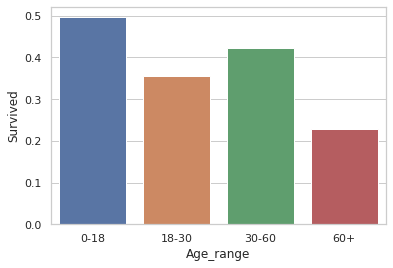

In [176]:
sns.barplot(data=titanic,x='Age_range',y='Survived',ci=None)

<AxesSubplot:xlabel='Age_range', ylabel='Survived'>

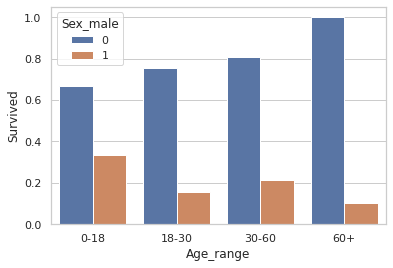

In [177]:
sns.barplot(data=titanic,x='Age_range',y='Survived',ci=None,hue='Sex_male')

## Training decision tree model

In [80]:
#choosing a model
clf = DecisionTreeClassifier()

search = GridSearchCV(clf, param_grid = {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[2,6,10,20],'min_samples_split':[2,3,4],'max_features':['auto','sqrt','log2']})

In [81]:
search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']})

In [72]:
#choosing best params
search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 4,
 'splitter': 'random'}

In [82]:
clf = DecisionTreeClassifier()
search1 = GridSearchCV(clf, param_grid = {})
search1.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), param_grid={})

In [84]:
search.score(X, y)

0.8935574229691877

In [83]:
search1.score(X,y)

0.9215686274509803

## Testing model

In [85]:
#predicting the model
prediction = search.predict(X_test)

In [86]:
prediction1 = search1.predict(X_test)

In [87]:
#accuracy score for the prediction
accuracy_score(prediction,y_test)

0.7932960893854749

In [88]:
#original model
accuracy_score(prediction1,y_test)

0.7094972067039106

Partner group's model is great for the training data but not for test data. This is overfitting. Our model manages fairly well with train data and test data. Our model seems not to be overfitting.

## SVM model

In [89]:
from sklearn import svm

In [109]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [110]:
clf.score(X,y)

0.680672268907563

In [111]:
pred = clf.predict(X_test)

In [112]:
accuracy_score(pred,y_test)

0.659217877094972

# Logistic regression model

In [115]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [117]:
logreg.score(X,y)

0.7955182072829131

In [119]:
pred = logreg.predict(X_test)

In [121]:
accuracy_score(pred,y_test)

0.7653631284916201

In [122]:
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.806 +/- 0.050


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=58120cee-a96d-431f-b1b0-fbb581c5808e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>